In [1]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [4]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                   mean       std    median      5.0%     95.0%     n_eff     r_hat
         A[0]      0.64      0.26      0.69      0.22      1.00    968.66      1.00
   alpha_1[0]      2.16      1.55      2.12      0.11      4.98    842.75      1.00
   alpha_2[0]     -1.73      0.24     -1.73     -2.13     -1.35    658.90      1.00
 alpha_chi[0]      1.48      0.38      1.39      1.00      1.98   1042.40      1.00
    beta_1[0]      0.32      1.13      0.16     -1.61      1.99    675.23      1.01
    beta_2[0]      3.09      0.80      3.06      1.75      4.38    809.27      1.00
  beta_chi[0]      3.69      0.77      3.72      2.55      4.94    780.79      1.00
  eta_high[0]     27.93     13.45     28.63      8.62     49.59   1142.68      1.00
   eta_low[0]     25.16     14.26     25.68      4.27     47.34   1326.95      1.00
   eta_max[0]      5.59      1.87      5.37      2.44      8.74    547.85      1.00
   eta_min[0]     29.49     11.49     29.04     10.01     45.90   1100.03  

(array([  2.,   9.,  13.,  17.,  37.,  58.,  85., 125., 114., 124., 119.,
        100.,  59.,  62.,  43.,  17.,   6.,   6.,   3.,   1.]),
 array([-2.41215101, -1.9896038 , -1.56705659, -1.14450937, -0.72196216,
        -0.29941495,  0.12313227,  0.54567948,  0.96822669,  1.39077391,
         1.81332112,  2.23586833,  2.65841555,  3.08096276,  3.50350997,
         3.92605718,  4.3486044 ,  4.77115161,  5.19369882,  5.61624604,
         6.03879325]),
 <BarContainer object of 20 artists>)

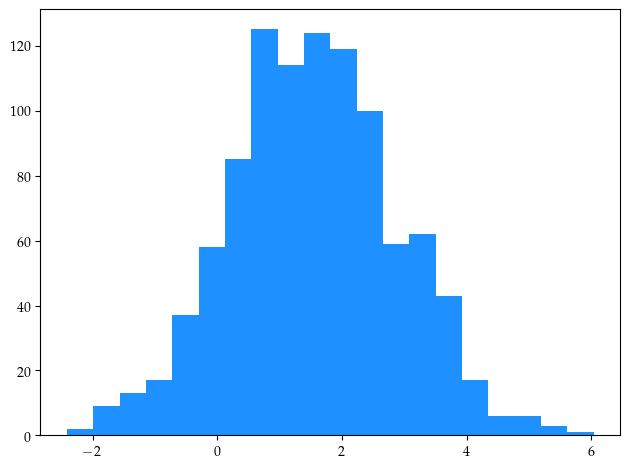

In [7]:
plt.hist(posterior_samples["kappa"], bins = 20)

TypeError: prob_chi() got an unexpected keyword argument 'm'

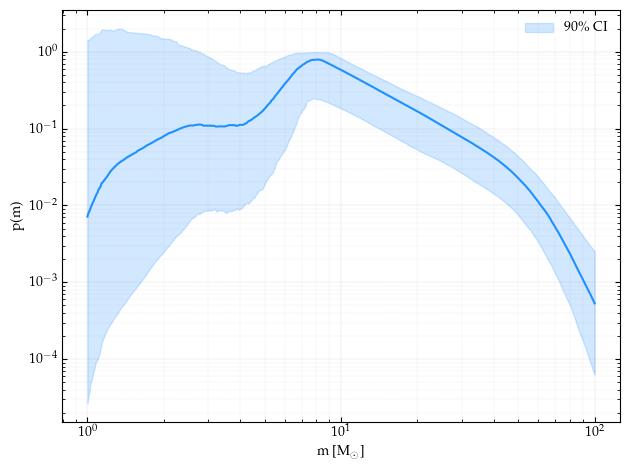

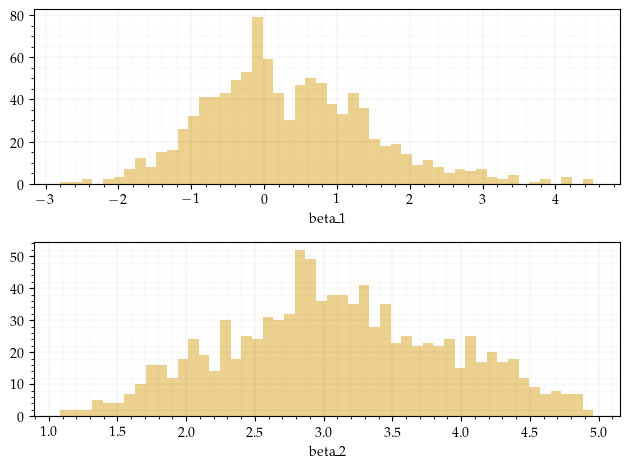

<Figure size 640x480 with 0 Axes>

In [6]:
from config.mass1d_func import pdb
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=pdb)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()

In [ ]:
import arviz as az
data = az.from_numpyro(mcmc)
var_names_lst = get_non_deterministic_params(mcmc)

if len(var_names_lst) >= 20:
    cut1 = var_names_lst[:20]
    cut2 = var_names_lst[20:]

    assert len(cut1) + len(cut2) == len(var_names_lst)

    az.plot_trace(data, var_names=cut1, compact=True)
    plt.savefig("results/trace1.png")
    az.plot_trace(data, var_names=cut2, compact=True)
    plt.savefig("results/trace2.png")
else:
    az.plot_trace(data, var_names=var_names_lst, compact=True)
    plt.savefig("results/trace.png")